## Enron Ouliers
In the mini-project for the regressions lesson, you used a regression to predict the bonuses for Enron employees. As you saw, even a single outlier can make a big difference on the regression result. There was something we didn’t tell you, though, which was that the dataset we had you use in that project had already been cleaned of some significant outliers. Identifying and cleaning away outliers is something you should always think about when looking at a dataset for the first time, and now you’ll get some hands-on experience with the Enron data.

https://github.com/mudspringhiker/ud120-projects/blob/master/outliers/enron_outliers.py

You can find the starter code in outliers/enron_outliers.py, which reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.) Add these lines to the bottom of the script to make your scatterplot:

```
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
```

As you can see, visualization is one of the most powerful tools for finding outliers!

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [4]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)
        return targets and features as separate lists
        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [5]:
data_dict = pickle.load(open("../ud120-projects/final_project/final_project_dataset.pkl", "r"))

In [6]:
features = ["salary", "bonus"]

In [8]:
data = featureFormat(data_dict, features)

In [10]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [9]:
data

array([[  3.65788000e+05,   6.00000000e+05],
       [  2.67102000e+05,   1.20000000e+06],
       [  1.70941000e+05,   3.50000000e+05],
       [  2.43293000e+05,   1.50000000e+06],
       [  2.67093000e+05,   3.25000000e+05],
       [  3.70448000e+05,   2.60000000e+06],
       [  1.97091000e+05,   4.00000000e+05],
       [  1.30724000e+05,   0.00000000e+00],
       [  2.88589000e+05,   7.88750000e+05],
       [  2.48546000e+05,   8.50000000e+05],
       [  2.57486000e+05,   7.00000000e+05],
       [  2.88542000e+05,   1.20000000e+06],
       [  2.51654000e+05,   1.10000000e+06],
       [  2.88558000e+05,   2.50000000e+05],
       [  6.37440000e+04,   0.00000000e+00],
       [  3.57091000e+05,   8.50000000e+05],
       [  2.71442000e+05,   3.10000000e+06],
       [  3.04110000e+05,   2.00000000e+06],
       [  1.87922000e+05,   2.50000000e+05],
       [  2.13625000e+05,   1.00000000e+06],
       [  2.49201000e+05,   7.00000000e+05],
       [  2.31330000e+05,   7.00000000e+05],
       [  

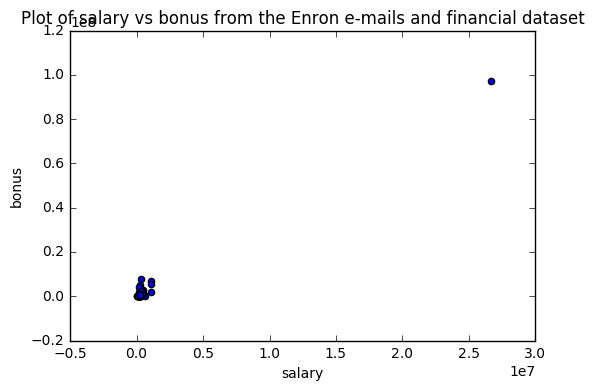

In [15]:
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)
    
plt.xlabel('salary')
plt.ylabel('bonus')
plt.title('Plot of salary vs bonus from the Enron e-mails and financial dataset')
plt.show()

#### Identify the biggest Enron Outlier

There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in final_project/enron61702insiderpay.pdf 
What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

https://github.com/mudspringhiker/ud120-projects/blob/master/final_project/enron61702insiderpay.pdf

-- TOTAL

#### Remove Enron Outlier?

Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?

-- Remove!

#### Any more outliers?

A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 ) Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat(). Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone?


In [16]:
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [18]:
data = featureFormat(data_dict, features)

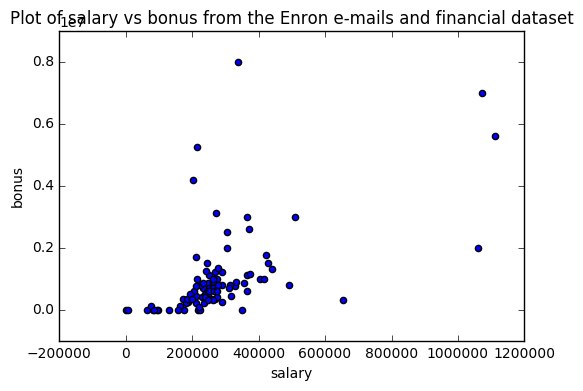

In [19]:
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)
    
plt.xlabel('salary')
plt.ylabel('bonus')
plt.title('Plot of salary vs bonus from the Enron e-mails and financial dataset')
plt.show()

<-- Still has some outliers

#### Identifying two more outliers

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those points?

In [49]:
for key in data_dict:
    if (data_dict[key]["bonus"] > 5000000) and (data_dict[key]["salary"] > 1000000) and 
            (data_dict[key]["bonus"] != "NaN"):
        print key

LAY KENNETH L
SKILLING JEFFREY K


#### Remove these outliers?

Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)

- No, should not be removed